In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [84]:
mcdonalds = pd.read_csv('mcdonalds.csv')

In [85]:
mcdonalds.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [86]:
mcdonalds.shape

(1453, 15)

In [87]:
mcdonalds.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


As columns 1 to 11 contain segmentation varialbes, we need to convert them into categorical variables.

In [88]:
for col in mcdonalds.iloc[:,:11].columns:
    mcdonalds[col] = mcdonalds[col].map({'Yes':1,'No':0})
mcdonalds

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


In [89]:
df = mcdonalds.iloc[:,:11]

In [90]:
df.mean()

yummy         0.552650
convenient    0.907777
spicy         0.093599
fattening     0.867171
greasy        0.526497
fast          0.900206
cheap         0.598761
tasty         0.644184
expensive     0.357880
healthy       0.198899
disgusting    0.242946
dtype: float64

In [91]:
df.dtypes

yummy         int64
convenient    int64
spicy         int64
fattening     int64
greasy        int64
fast          int64
cheap         int64
tasty         int64
expensive     int64
healthy       int64
disgusting    int64
dtype: object

We are not standardising the data as it is already encoded.

In [92]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df)

PCA()

In [51]:
pca_result = pca.fit_transform(df)

In [52]:
pca.explained_variance_ratio_

array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [53]:
pca_components = pd.DataFrame(pca.components_, columns = df.columns)

In [54]:
pca_components

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,-0.476933,-0.155332,-0.006356,0.116232,0.304443,-0.108493,-0.337186,-0.471514,0.329042,-0.213711,0.374753
1,0.363790,0.016414,0.018809,-0.034094,-0.063839,-0.086972,-0.610633,0.307318,0.601286,0.076593,-0.139656
2,-0.304444,-0.062515,-0.037019,-0.322359,-0.802373,-0.064642,-0.149310,-0.287265,0.024397,0.192051,-0.088571
3,0.055162,-0.142425,0.197619,-0.354139,0.253960,-0.097363,0.118958,-0.002547,0.067816,0.763488,0.369539
4,-0.307535,0.277608,0.070620,-0.073405,0.361399,0.107930,-0.128973,-0.210899,-0.003125,0.287846,-0.729209
5,0.170738,-0.347830,-0.355087,-0.406515,0.209347,-0.594632,-0.103241,-0.076914,-0.261342,-0.178226,-0.210878
6,-0.280519,-0.059738,0.707637,-0.385943,0.036170,-0.086846,-0.040449,0.360453,-0.068385,-0.349616,-0.026792
7,0.013041,-0.113079,0.375934,0.589622,-0.138241,-0.627799,0.140060,-0.072792,0.029539,0.176303,-0.167181
8,0.572403,-0.018465,0.400280,-0.160512,-0.002847,0.166197,0.076069,-0.639086,0.066996,-0.185572,-0.072483
9,-0.110284,-0.665818,-0.075634,-0.005338,0.008707,0.239532,0.428087,0.079184,0.454399,-0.038117,-0.289592


In [55]:
pca_result

array([[ 0.42536706, -0.21907878,  0.6632553 , ...,  0.18100693,
         0.51570617, -0.56707389],
       [-0.21863768,  0.38818996, -0.73082668, ...,  0.11147641,
         0.49331285, -0.50044033],
       [ 0.37541475,  0.73043507, -0.12203978, ..., -0.32228786,
         0.06175857,  0.24274108],
       ...,
       [-0.18589445,  1.06266156,  0.22085675, ...,  0.03825472,
         0.05651822, -0.01279977],
       [-1.18206441, -0.03856977,  0.56156066, ...,  0.02226748,
        -0.00257265, -0.10531631],
       [ 1.55024186,  0.27503101, -0.01373727, ..., -0.13658866,
        -0.43279782, -0.45607556]])

the two segmentation variables with the highest loadings (in absolute terms) for principal component 2 are CHEAP and EXPENSIVE, indicating that this principal component captures the price dimension.

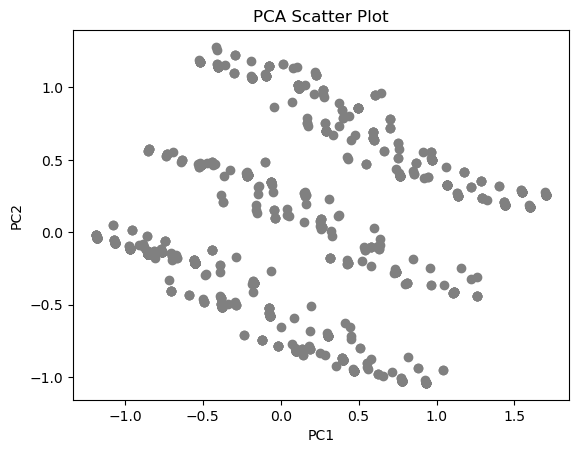

In [56]:
plt.scatter(pca_result[:, 0], pca_result[:, 1], color='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot')
plt.show()

Extracting segments using Kmeans

In [17]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
np.random.seed(1234)
silhouette_scores = []
cluster_labels = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(df)
    cluster_labels.append(kmeans.labels_)
    silhouette_scores.append(silhouette_score(df, kmeans.labels_))

best_k = np.argmax(silhouette_scores)
MD_km28 = cluster_labels[best_k]

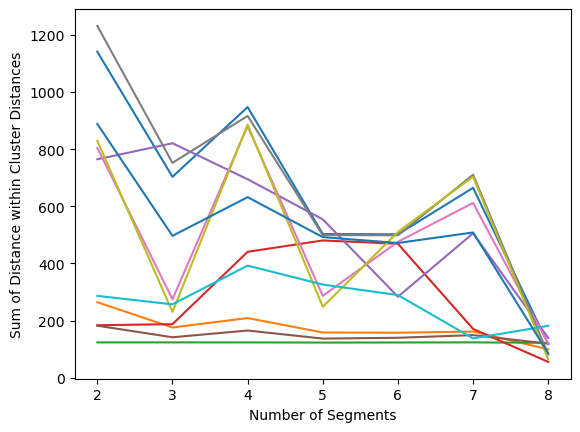

In [18]:
num_segments = range(2, 9)
sum_distances = []

for labels in cluster_labels:
    kmeans.inertia_ = 0
    for i in range(k):
        cluster_points = df[labels == i]
        if len(cluster_points) > 0:
            kmeans.inertia_ += np.sum((cluster_points - kmeans.cluster_centers_[i]) ** 2)
    sum_distances.append(kmeans.inertia_)

plt.plot(num_segments, sum_distances)
plt.xlabel('Number of Segments')
plt.ylabel('Sum of Distance within Cluster Distances')
plt.show()

Stability based data structure analysis

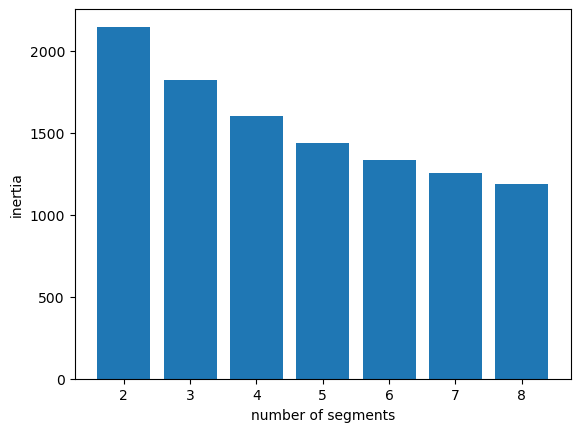

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
np.random.seed(1234)
k_values = range(2, 9)
inertias = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

best_k = np.argmin(inertias) + 2
best_kmeans = KMeans(n_clusters=best_k, n_init=10, random_state=1234)
best_kmeans.fit(df)

plt.bar(k_values, inertias)
plt.xlabel("number of segments")
plt.ylabel("inertia")
plt.show()

Using mixture of distributions

In [20]:
from sklearn.mixture import GaussianMixture

np.random.seed(1234)

X = np.array(df) # Assuming MD.x is the input data

bic_scores = []
models = []

for k in range(2, 9):
    bic = []
    for _ in range(10):
        gmm = GaussianMixture(n_components=k, covariance_type='full')
        gmm.fit(X)
        bic.append(gmm.bic(X))
    bic_scores.append(np.mean(bic))
    models.append(gmm)

best_model_index = np.argmin(bic_scores)
best_model = models[best_model_index]

print(best_model)

GaussianMixture(n_components=8)


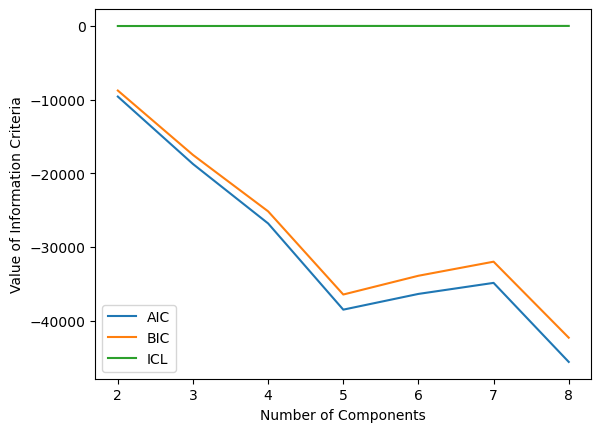

[[3 0]
 [0 2]
 [0 2]
 ...
 [0 2]
 [2 1]
 [1 0]]
[[3 0]
 [0 1]
 [0 0]
 ...
 [0 1]
 [2 2]
 [1 0]]
11.585707065408238
9.43868628512001


In [30]:
from sklearn.mixture import GaussianMixture

n_components = range(2, 9)
models = []
for n in n_components:
    model = GaussianMixture(n_components=n)
    model.fit(df)
    models.append(model)

import matplotlib.pyplot as plt
aic = [model.aic(df) for model in models]
bic = [model.bic(df) for model in models]
icl = [model.lower_bound_ for model in models]

plt.plot(n_components, aic, label='AIC')
plt.plot(n_components, bic, label='BIC')
plt.plot(n_components, icl, label='ICL')
plt.xlabel('Number of Components')
plt.ylabel('Value of Information Criteria')
plt.legend()
plt.show()

best_model = models[2]

kmeans = KMeans(n_clusters=4,  n_init=10)
kmeans.fit(df)
kmeans_clusters = kmeans.predict(df)
mixture_clusters = best_model.predict(df)

table = np.column_stack((kmeans_clusters, mixture_clusters))
print(table)

mixture_model = GaussianMixture(n_components=4)
mixture_model.fit(df, kmeans_clusters)

new_mixture_clusters = mixture_model.predict(df)
table = np.column_stack((kmeans_clusters, new_mixture_clusters))
print(table)

log_likelihood = mixture_model.score(df)
print(log_likelihood)

log_likelihood_best = best_model.score(df)
print(log_likelihood_best)


Using Mixtures of Regression Models

In [95]:
mcdonalds['Like']= mcdonalds.Like.replace('I love it!+5','+5')

In [96]:
mcdonalds['Like']= mcdonalds.Like.replace('I hate it!-5','-5')

In [97]:
mcdonalds.Like.value_counts()

+3    229
+2    187
0     169
+4    160
+1    152
-5    152
+5    143
-3     73
-4     71
-2     59
-1     58
Name: Like, dtype: int64

In [98]:
mcdonalds

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


In [99]:
like_freq_table = mcdonalds['Like'].value_counts().sort_index(ascending=False)
mcdonalds['Like.n'] = mcdonalds['Like'].astype(int)
like_n_freq_table = mcdonalds['Like.n'].value_counts().sort_index()

In [36]:
MD_reg2 = GaussianMixture(n_components=2, n_init=10, random_state=1234)
MD_reg2.fit(mcdonalds.iloc[:,:13])

# Print the Flexmix model
print(MD_reg2)

# Refit the Flexmix model
MD_ref2 = MD_reg2

# # Plot the refitted model
# # MD_ref2.plot(significance=True)
# plt.boxplot(MD_ref2)
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('Gaussian Mixture Model')
# plt.show()

GaussianMixture(n_components=2, n_init=10, random_state=1234)


Text(0.5, 1.0, 'Dendrogram')

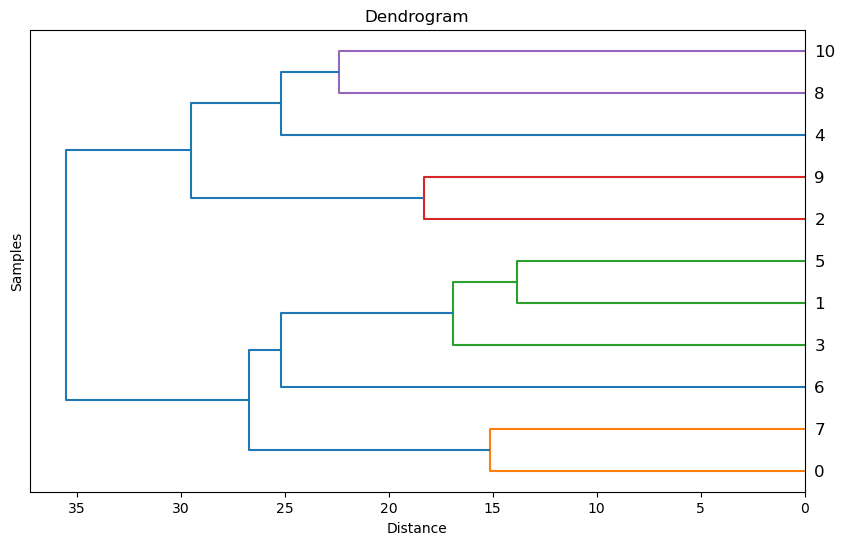

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

MD_vclust = linkage(df.T, method='complete')

plt.figure(figsize=(10, 6))
dendrogram(MD_vclust, orientation='left')
plt.xlabel("Distance")
plt.ylabel("Samples")
plt.title("Dendrogram")


Text(0.5, 1.0, 'Cluster Assignment (k=4)')

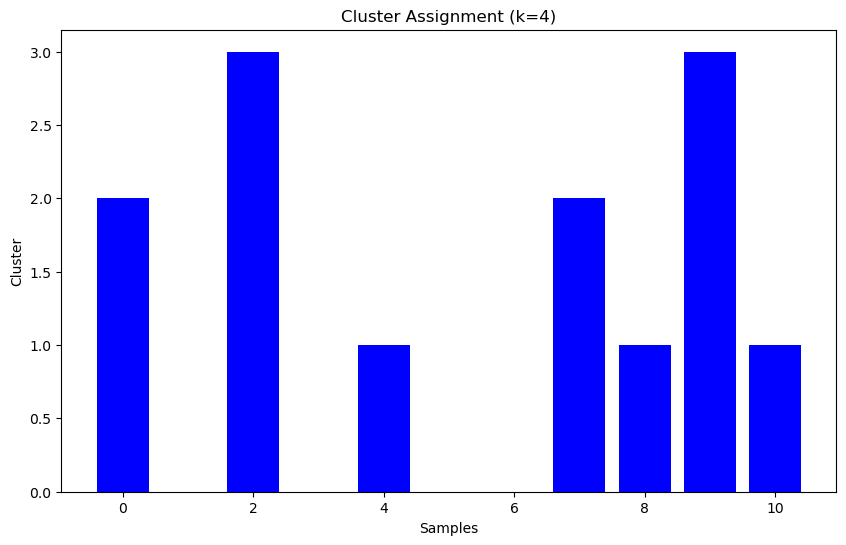

In [48]:
k = 4
kmeans = AgglomerativeClustering(n_clusters=k, linkage='ward')
MD_k4 = kmeans.fit_predict(df.T)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(MD_k4)), MD_k4, color='blue')
plt.xlabel("Samples")
plt.ylabel("Cluster")
plt.title("Cluster Assignment (k=4)")

Text(0.5, 1.0, 'PCA Projection (k=4)')

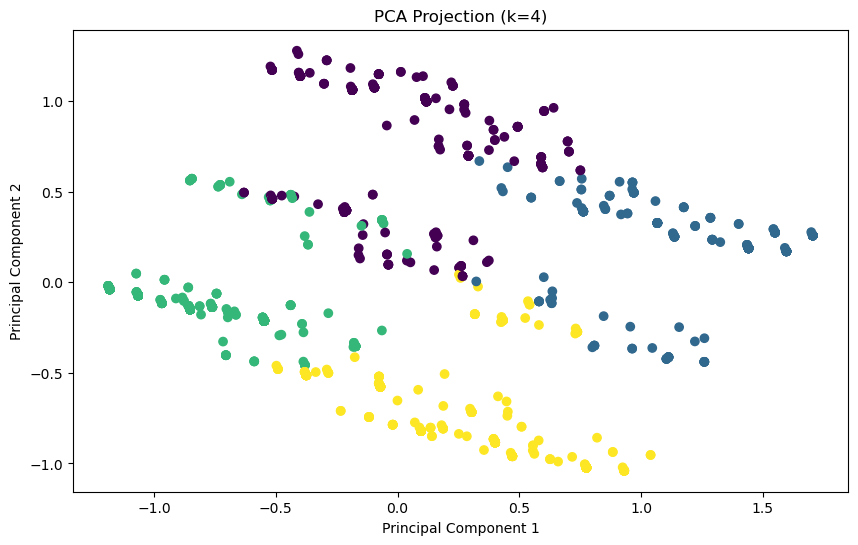

In [59]:
# pca = PCA(n_components=2)
# MD_pca = pca.fit_transform(df)

# Plot the PCA projection
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_clusters, cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection (k=4)")

<Figure size 800x600 with 0 Axes>

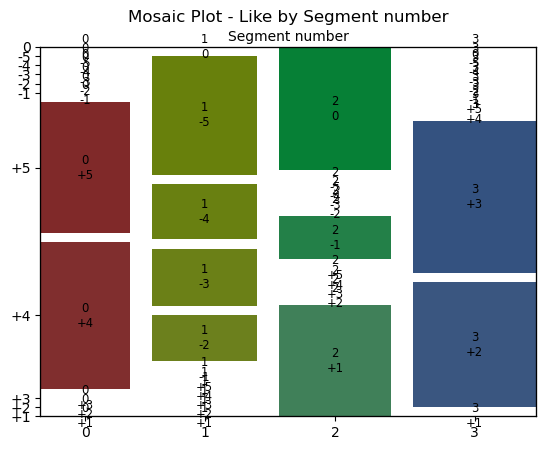

In [74]:
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.tree import DecisionTreeClassifier, plot_tree

kmeans = KMeans(n_clusters=4, n_init=10)
kmeans.fit(mcdonalds[['Like']])
k4 = kmeans.labels_

k4_like_table = pd.crosstab(index=k4, columns=mcdonalds['Like'])
plt.figure(figsize=(8, 6))
mosaic(k4_like_table.stack(), title='Mosaic Plot - Like by Segment number', gap=0.05)
plt.xlabel("Segment number")
plt.ylabel("Like")
plt.show()

<Figure size 800x600 with 0 Axes>

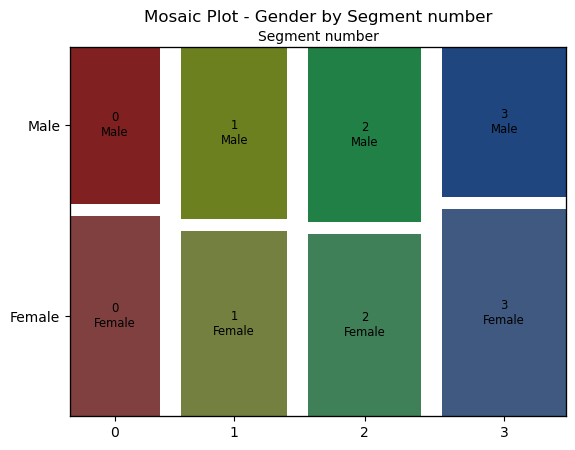

In [75]:
k4_gender_table = pd.crosstab(index=k4, columns=mcdonalds['Gender'])
plt.figure(figsize=(8, 6))
mosaic(k4_gender_table.stack(), title='Mosaic Plot - Gender by Segment number', gap=0.05)
plt.xlabel("Segment number")
plt.ylabel("Gender")
plt.show()

In [107]:
mcdonalds

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Like.n
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0,0,-3
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,0,0,2
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,0,0,1
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,4,0,4
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,5,1,-5
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,4,0,2
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,3,0,3
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,0,1,4


In [101]:
mcdonalds.VisitFrequency.value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [103]:
mcdonalds.Gender.value_counts()

Female    788
Male      665
Name: Gender, dtype: int64

In [104]:
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
mcdonalds['VisitFrequency'] = labelencoder.fit_transform(mcdonalds['VisitFrequency']) #fitting and transforming the desired categorical column.

In [106]:
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
mcdonalds['Gender'] = labelencoder.fit_transform(mcdonalds['Gender']) 

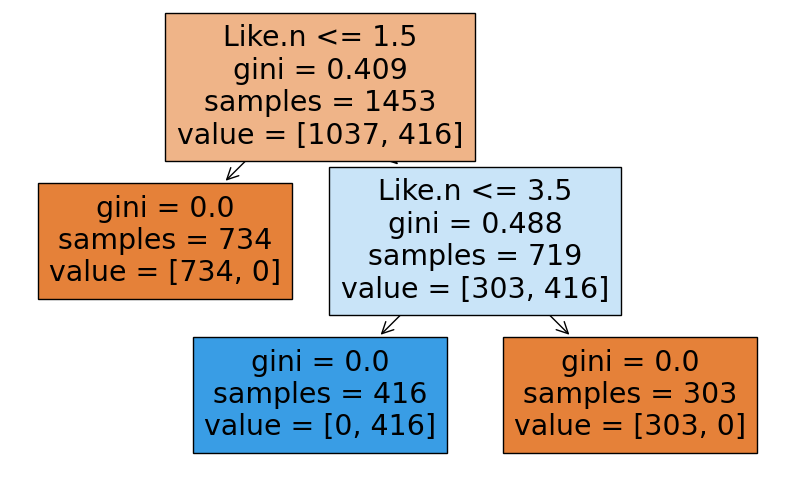

In [109]:
X = mcdonalds[['Like.n', 'Age', 'VisitFrequency', 'Gender']]
y = (k4 == 3).astype(int)

tree = DecisionTreeClassifier()
tree.fit(X, y)

plt.figure(figsize=(10, 6))
plot_tree(tree, feature_names=X.columns, filled=True)
plt.show()

Selecting the Target Segments

In [112]:
visit = mcdonalds.groupby(k4)['VisitFrequency'].mean()

In [113]:
visit

0    2.877888
1    2.870423
2    2.443272
3    2.442308
Name: VisitFrequency, dtype: float64

In [114]:
like = mcdonalds.groupby(k4)['Like.n'].mean()

In [116]:
like

0    4.471947
1   -3.890141
2    0.248021
3    2.550481
Name: Like.n, dtype: float64

In [117]:
female = mcdonalds.groupby(k4)['Gender'].apply(lambda x: (x == 'Female').mean())

In [118]:
female

0    0.0
1    0.0
2    0.0
3    0.0
Name: Gender, dtype: float64

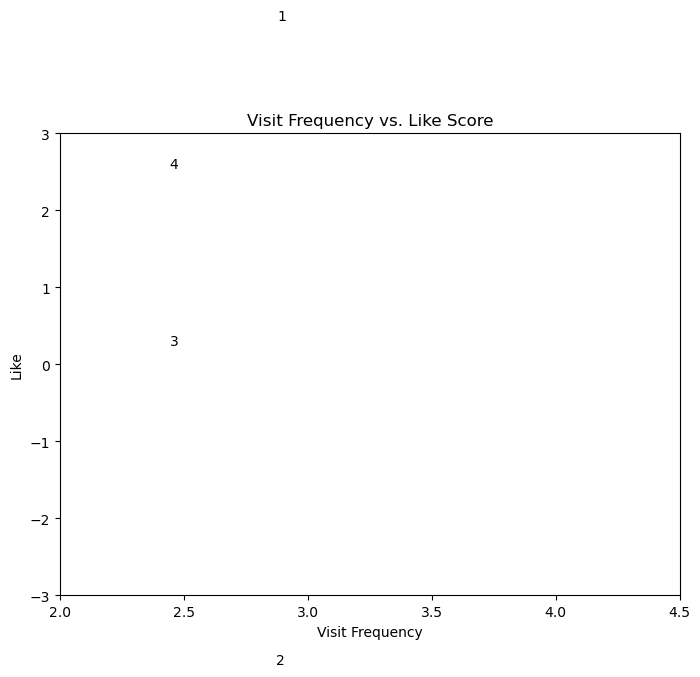

In [122]:
plt.figure(figsize=(8, 6))
plt.scatter(visit, like, s=10 * female)
plt.xlim(2, 4.5)
plt.ylim(-3, 3)
plt.xlabel("Visit Frequency")
plt.ylabel("Like")
plt.title("Visit Frequency vs. Like Score")
for i, txt in enumerate(range(1, 5)):
    plt.text(visit[i], like[i], txt)
plt.show()